# "Reproducing" the Third Figure from the Lunch Talk
In this test notebook, I will examine the code that should create the juxtaposed KLF's of stars from the Galacitc Center and from their MIST and BPASS cluster counterparts. Final product should be similar to Figure 1 in Lu et al. 2013.

Firstly, I grab some code from the  jlu_python/jlu/papers/lu_gc_imf.py directory in the Moving Universe Lab's computers.

In [1]:
# After spending a bit of time figuring out how pickling files and loading works
# I have finally done it.

# These come from 
import pickle
import sys

class dat:
    datin = "Container of Data"

def load_klf_by_radius(rmin=0, rmax=30, mask_for_log=False):
    pickleFile = ('%sklf_r_%.1f_%.1f.dat' %
                  ('/Users/jlu/work/gc/imf/klf/current/', rmin, rmax))
    _in = open(pickleFile, 'rb')
    d = dat()
    d.Kp = pickle.load(_in,encoding='bytes')
    d.N = pickle.load(_in, encoding='bytes')
    d.eN = pickle.load(_in, encoding='bytes')

    d.N_ext = pickle.load(_in, encoding='bytes')
    d.eN_ext = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp = pickle.load(_in, encoding='bytes')
    d.eN_ext_cmp_sp = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp_im = pickle.load(_in, encoding='bytes')
    d.eN_ext_cmp_sp_im = pickle.load(_in, encoding='bytes')

    d.KLF = pickle.load(_in, encoding='bytes')
    d.eKLF = pickle.load(_in, encoding='bytes')

    d.KLF_ext = pickle.load(_in,
                            encoding='bytes')
    d.eKLF_ext = pickle.load(_in,
                             encoding='bytes')

    d.KLF_ext_cmp_sp = pickle.load(_in, encoding='bytes')
    d.eKLF_ext_cmp_sp = pickle.load(_in, encoding='bytes')

    d.KLF_ext_cmp_sp_im = pickle.load(_in,
                                      encoding='bytes')
    d.eKLF_ext_cmp_sp_im = pickle.load(_in,
                                       encoding='bytes')

    d.N_noWR = pickle.load(_in, encoding='bytes')
    d.eN_noWR = pickle.load(_in, encoding='bytes')

    d.N_ext_noWR = pickle.load(_in, encoding='bytes')
    d.eN_ext_noWR = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp_noWR = pickle.load(_in,
                                      encoding='bytes')
    d.eN_ext_cmp_sp_noWR = pickle.load(_in,
                                       encoding='bytes')

    d.N_ext_cmp_sp_im_noWR = pickle.load(_in,
                                         encoding='bytes')
    d.eN_ext_cmp_sp_im_noWR = pickle.load(_in,
                                          encoding='bytes')

    d.KLF_noWR = pickle.load(_in, encoding='bytes')
    d.eKLF_noWR = pickle.load(_in, encoding='bytes')

    d.KLF_ext_noWR = pickle.load(_in, encoding='bytes')
    d.eKLF_ext_noWR = pickle.load(_in, encoding='bytes')

    d.KLF_ext_cmp_sp_noWR = pickle.load(_in,
                                        encoding='bytes')
    d.eKLF_ext_cmp_sp_noWR = pickle.load(_in,
                                         encoding='bytes')

    d.KLF_ext_cmp_sp_im_noWR = pickle.load(_in,
                                           encoding='bytes')
    d.eKLF_ext_cmp_sp_im_noWR = pickle.load(_in,
                                            encoding='bytes')

    d.comp_spec_ext = pickle.load(_in, encoding='bytes')
    d.comp_imag_ext = pickle.load(_in, encoding='bytes')

    if mask_for_log:
        # Repair for zeros since we are plotting in semi-log-y
        d.eN = np.ma.masked_where(d.N <= 0, d.eN)
        d.N = np.ma.masked_where(d.N <= 0, d.N)

        d.eN_ext = np.ma.masked_where(d.N_ext <= 0, d.eN_ext)
        d.N_ext = np.ma.masked_where(d.N_ext <= 0, d.N_ext)

        d.eN_ext_cmp_sp = np.ma.masked_where(d.N_ext_cmp_sp <=
                                             0, d.eN_ext_cmp_sp)
        d.N_ext_cmp_sp = np.ma.masked_where(d.N_ext_cmp_sp <=
                                            0, d.N_ext_cmp_sp)

        d.eN_ext_cmp_sp_im = np.ma.masked_where(d.N_ext_cmp_sp_im <=
                                                0, d.eN_ext_cmp_sp_im)
        d.N_ext_cmp_sp_im = np.ma.masked_where(d.N_ext_cmp_sp_im <=
                                               0, d.N_ext_cmp_sp_im)
        
        d.eKLF = np.ma.masked_where(d.KLF <= 0, d.eKLF)
        d.KLF = np.ma.masked_where(d.KLF <= 0, d.KLF)
        
        d.eKLF_ext = np.ma.masked_where(d.KLF_ext <= 0,
                                        d.eKLF_ext)
        d.KLF_ext = np.ma.masked_where(d.KLF_ext <= 0,
                                       d.KLF_ext)
        
        d.eKLF_ext_cmp_sp = np.ma.masked_where(d.KLF_ext_cmp_sp <= 0, 
                                               d.eKLF_ext_cmp_sp)
        d.KLF_ext_cmp_sp = np.ma.masked_where(d.KLF_ext_cmp_sp <= 0, 
                                              d.KLF_ext_cmp_sp)
        
        d.eKLF_ext_cmp_sp_im = (np.ma.
                                masked_where(d.KLF_ext_cmp_sp_im <=
                                             0, d.eKLF_ext_cmp_sp_im))
        d.KLF_ext_cmp_sp_im = (np.ma.
                               masked_where(d.KLF_ext_cmp_sp_im <=
                                            0, d.KLF_ext_cmp_sp_im))


    _in.close()

    return d

The following line loads data from /Users/jlu/work/gc/imf/klf/current/klf_r_0.0_30.0.dat. Recall I use the noWR option as the corresponding figure 

In [2]:
import numpy as np
result = load_klf_by_radius(mask_for_log=True)
result.KLF_ext_cmp_sp_im_noWR
magBin = result.Kp[1] - result.Kp[0]
idx = np.where(result.Kp < 16)[0]

Now, I create the BPASS isochrone for that specific age. $10^{6.78}$ years of age (around 6 million years). From that isochrone, I will create a cluster using an IMF of $\alpha = 1.7$.

In [3]:
from spisea import synthetic
BPASS_iso = synthetic.Isochrone_Binary(6.78, 2.7,
                                       8000, 0.0, filters=['nirc2,Kp'])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1792: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = geta

Changing to logg=3.50 for T= 26935 logg=3.29
Changing to T= 50000 for T= 50518 logg=3.84
Changing to logg=5.00 for T= 50518 logg=3.84
Changing to T= 50000 for T=168628 logg=5.83
Changing to logg=5.00 for T=168628 logg=5.83
Changing to logg=3.50 for T= 27821 logg=3.39
Changing to T= 50000 for T=166073 logg=5.80
Changing to logg=5.00 for T=166073 logg=5.80
Changing to T= 50000 for T=162596 logg=5.78
Changing to logg=5.00 for T=162596 logg=5.78
Changing to logg=3.00 for T= 23226 logg=2.95
Changing to T= 50000 for T=169071 logg=5.83
Changing to logg=5.00 for T=169071 logg=5.83
Changing to T= 50000 for T=166855 logg=5.80
Changing to logg=5.00 for T=166855 logg=5.80
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=143840 logg=5.56
Changing to logg=5.00 for T=143840 logg=5.56
Changing to T= 50000 for T=113794 logg=5.39
Changing to logg=5.00 for T=113794 logg=5.39
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.

Changing to T= 50000 for T=113941 logg=5.39
Changing to logg=5.00 for T=113941 logg=5.39
Changing to T= 50000 for T=142249 logg=5.54
Changing to logg=5.00 for T=142249 logg=5.54
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=4.00 for T= 34990 logg=3.71
Changing to T= 50000 for T=138685 logg=5.50
Changing to logg=5.00 for T=138685 logg=5.50
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.00 for T=171676 logg=5.85
Changing to T= 50000 for T=143407 logg=5.56
Changing to logg=5.00 for T=143407 logg=5.56
Changing to T= 50000 for T=143632 logg=5.56
Changing to logg=5.00 for T=143632 logg=5.56
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=143863 logg=5.56
Changing to logg=

Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=114296 logg=5.39
Changing to logg=5.00 for T=114296 logg=5.39
Changing to T= 50000 for T=130242 logg=5.40
Changing to logg=5.00 for T=130242 logg=5.40
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to T= 50000 for T=140883 logg=5.53
Changing to logg=5.00 for T=140883 logg=5.53
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.00 for T=171676 logg=5.85
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.00 for T=171676 logg=5.85
Changing to logg=3.50 for T= 28403 logg=3.48
Changing to T= 50000 for T=128869 logg=5.38
Changing to logg=5.00 for T=128869 logg=5.38
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=142939 logg=5.55
Changing to logg=

Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=113794 logg=5.38
Changing to logg=5.00 for T=113794 logg=5.38
Changing to logg=4.00 for T= 37720 logg=3.84
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=173010 logg=5.87
Changing to logg=5.00 for T=173010 logg=5.87
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=173014 logg=5.86
Changing to logg=5.00 for T=173014 logg=5.86
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.00 for T=171676 logg=5.85
Changing to T= 50000 for T=176405 logg=5.89
Changing to logg=5.00 for T=176405 logg=5.89
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=142180 logg=5.54
Changing to logg=5.00 for T=142180 logg=5.54
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to T= 50000 for T=114164 logg=5.39
Changing to logg=

Changing to T= 50000 for T=171648 logg=5.85
Changing to logg=5.00 for T=171648 logg=5.85
Changing to T= 50000 for T=140556 logg=5.53
Changing to logg=5.00 for T=140556 logg=5.53
Changing to T= 50000 for T=113616 logg=5.38
Changing to logg=5.00 for T=113616 logg=5.38
Changing to logg=4.50 for T= 44832 logg=3.62
Changing to logg=3.50 for T= 29252 logg=3.49
Changing to T= 50000 for T=141449 logg=5.54
Changing to logg=5.00 for T=141449 logg=5.54
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=4.00 for T= 32415 logg=3.40
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 26836 logg=3.29
Changing to T= 50000 for T=114120 logg=5.39
Changing to logg=5.00 for T=114120 logg=5.39
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 27538 logg=3.37
Changing to T= 50000 for T=112969 logg=5.39
Changing to logg=5.00 for T=112969 logg=5.39
Changing to logg

Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to T= 50000 for T=139268 logg=5.51
Changing to logg=5.00 for T=139268 logg=5.51
Changing to logg=3.50 for T= 27699 logg=3.38
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=2.50 for T= 16750 logg=2.11
Changing to T= 50000 for T=131586 logg=5.41
Changing to logg=5.00 for T=131586 logg=5.41
Changing to T= 50000 for T=172326 logg=5.86
Changing to logg=5.00 for T=172326 logg=5.86
Changing to T= 50000 for T=114251 logg=5.39
Changing to logg=5.00 for T=114251 logg=5.39
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=110507 logg=5.40
Changing to logg=5.00 for T=110507 logg=5.40
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.00 for T=171676 logg=5.85
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 5

Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=4.00 for T= 35206 logg=3.99
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.00 for T= 22769 logg=2.88
Changing to logg=4.00 for T= 34694 logg=3.46
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=160313 logg=5.74
Changing to logg=5.00 for T=160313 logg=5.74
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to T= 50000 for T=114456 logg=5.39
Changing to logg=5.00 for T=114456 logg=5.39
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.00 for T=171676 logg=5.85
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=3.00 for T= 22296 logg=2.68
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=113431 logg=5.38
Changing to lo

Changing to T= 50000 for T=143724 logg=5.56
Changing to logg=5.00 for T=143724 logg=5.56
Changing to logg=5.00 for T= 49363 logg=3.80
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=113642 logg=5.38
Changing to logg=5.00 for T=113642 logg=5.38
Changing to logg=3.50 for T= 27382 logg=3.36
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=2.50 for T= 18143 logg=2.19
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to T= 50000 for T=114317 logg=5.39
Changing to logg=5.00 for T=114317 logg=5.39
Changing to T= 50000 for T=131247 logg=5.40
Changing to logg=5.00 for T=131247 logg=5.40
Changing to T= 50000 for T=142883 logg=5.55
Changing to logg=5.00 for T=142883 logg=5.55
Changing to logg=3.00 for T= 22462 logg=2.87
Changing to logg=4.00 for T= 34409 logg=3.89
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=135201 logg=5.48
Changing to logg=5.00 for T=135201 logg=5.48
Changing to logg

Changing to logg=4.00 for T= 32402 logg=3.91
Changing to logg=4.00 for T= 31953 logg=3.81
Changing to T= 50000 for T=120654 logg=5.27
Changing to logg=5.00 for T=120654 logg=5.27
Changing to logg=4.00 for T= 32715 logg=3.85
Changing to logg=4.00 for T= 31283 logg=3.68
Changing to T= 50000 for T=169134 logg=5.83
Changing to logg=5.00 for T=169134 logg=5.83
Changing to T= 50000 for T=113204 logg=5.38
Changing to logg=5.00 for T=113204 logg=5.38
Changing to logg=5.00 for T=  1500 logg=4.44
Changing to T=  1200 for T=   808 logg=4.44
Changing to T=  1200 for T=   692 logg=4.44
Changing to logg=4.00 for T= 31846 logg=3.92
Changing to T= 50000 for T=111830 logg=5.39
Changing to logg=5.00 for T=111830 logg=5.39
Changing to T= 50000 for T=112673 logg=5.39
Changing to logg=5.00 for T=112673 logg=5.39
Changing to logg=3.50 for T= 28026 logg=3.29
Changing to logg=5.00 for T= 49783 logg=3.81
Changing to logg=4.00 for T= 31935 logg=3.96
Changing to logg=4.00 for T= 31960 logg=3.57
Changing to T= 50

Changing to T= 50000 for T=113222 logg=5.39
Changing to logg=5.00 for T=113222 logg=5.39
Changing to T= 50000 for T=107594 logg=5.04
Changing to logg=5.00 for T=107594 logg=5.04
Changing to T= 50000 for T=169134 logg=5.83
Changing to logg=5.00 for T=169134 logg=5.83
Changing to logg=4.00 for T= 31171 logg=4.00
Changing to logg=4.00 for T= 31935 logg=3.96
Changing to T= 50000 for T=120695 logg=5.26
Changing to logg=5.00 for T=120695 logg=5.26
Changing to logg=3.50 for T= 28424 logg=3.44
Changing to logg=4.00 for T= 31953 logg=3.81
Changing to logg=4.00 for T= 32024 logg=3.91
Changing to logg=4.00 for T= 31566 logg=3.99
Changing to logg=4.00 for T= 31820 logg=3.95
Changing to T= 50000 for T=112946 logg=5.38
Changing to logg=5.00 for T=112946 logg=5.38
Changing to logg=3.50 for T= 29637 logg=3.48
Changing to logg=3.50 for T= 27397 logg=3.35
Changing to logg=4.00 for T= 31827 logg=3.99
Changing to logg=4.00 for T= 31802 logg=3.84
Changing to logg=4.00 for T= 31827 logg=3.99
Changing to log

Changing to logg=3.50 for T= 28424 logg=3.44
Changing to logg=4.00 for T= 31283 logg=3.68
Changing to logg=4.00 for T= 31935 logg=3.96
Changing to T= 50000 for T=112805 logg=5.39
Changing to logg=5.00 for T=112805 logg=5.39
Changing to logg=4.00 for T= 32541 logg=3.84
Changing to logg=5.00 for T=  1616 logg=4.44
Changing to logg=4.00 for T= 31940 logg=3.82
Changing to T=  1200 for T=   750 logg=4.44
Changing to logg=4.00 for T= 31559 logg=3.62
Changing to logg=4.00 for T= 31791 logg=3.76
Changing to T=  1200 for T=   692 logg=4.44
Changing to logg=4.00 for T= 31846 logg=3.92
Changing to logg=5.00 for T=  1616 logg=4.44
Changing to logg=4.00 for T= 31171 logg=4.00
Changing to T= 50000 for T=100962 logg=5.46
Changing to logg=5.00 for T=100962 logg=5.46
Changing to T= 50000 for T=120940 logg=5.26
Changing to logg=5.00 for T=120940 logg=5.26
Changing to T=  1200 for T=   808 logg=4.44
Changing to logg=3.50 for T= 27397 logg=3.35
Changing to logg=4.00 for T= 31827 logg=3.99
Changing to logg

Changing to logg=3.50 for T= 27281 logg=3.32
Changing to logg=4.00 for T= 31444 logg=3.99
Changing to logg=4.00 for T= 32024 logg=3.91
Changing to T= 50000 for T=123441 logg=5.30
Changing to logg=5.00 for T=123441 logg=5.30
Changing to logg=4.00 for T= 31827 logg=3.99
Changing to logg=4.00 for T= 31171 logg=4.00
Changing to T= 50000 for T=120740 logg=5.26
Changing to logg=5.00 for T=120740 logg=5.26
Changing to T= 50000 for T=120862 logg=5.27
Changing to logg=5.00 for T=120862 logg=5.27
Changing to T=  1200 for T=   808 logg=4.44
Changing to logg=3.50 for T= 27281 logg=3.32
Changing to logg=4.00 for T= 31283 logg=3.68
Changing to logg=3.50 for T= 28179 logg=3.14
Changing to logg=4.00 for T= 31566 logg=3.99
Changing to T=  1200 for T=   750 logg=4.44
Changing to logg=4.00 for T= 32402 logg=3.91
Changing to T= 50000 for T=169134 logg=5.83
Changing to logg=5.00 for T=169134 logg=5.83
Changing to T= 50000 for T=107335 logg=5.04
Changing to logg=5.00 for T=107335 logg=5.04
Changing to T=  1

Changing to logg=4.00 for T= 32402 logg=3.91
Changing to logg=3.50 for T= 27281 logg=3.32
Changing to logg=3.50 for T= 27281 logg=3.32
Changing to logg=3.50 for T= 27397 logg=3.35
Changing to logg=3.50 for T= 27281 logg=3.32
Changing to logg=4.00 for T= 31953 logg=3.81
Changing to logg=4.00 for T= 31640 logg=3.75
Changing to logg=4.00 for T= 32172 logg=3.84
Changing to logg=4.00 for T= 31846 logg=3.92
Changing to logg=3.50 for T= 27397 logg=3.35
Changing to logg=4.00 for T= 32034 logg=3.94
Changing to logg=3.50 for T= 29358 logg=3.47
Changing to logg=4.00 for T= 33130 logg=3.86
Changing to logg=3.50 for T= 28424 logg=3.44
Changing to logg=5.00 for T= 49783 logg=3.81
Changing to logg=3.50 for T= 26555 logg=3.26
Changing to logg=3.50 for T= 26426 logg=3.28
Changing to logg=5.00 for T=  1616 logg=4.44
Changing to logg=3.50 for T= 27397 logg=3.35
Changing to logg=3.50 for T= 26756 logg=3.28
Changing to T= 50000 for T=121518 logg=5.27
Changing to logg=5.00 for T=121518 logg=5.27
Changing to

M =  20.700 Msun  T = 31791 K  m_nirc2_Kp = 13.58
M =   0.960 Msun  T =  5540 K  m_nirc2_Kp = 20.67
M =   0.980 Msun  T =  5655 K  m_nirc2_Kp = 20.62
M =  12.000 Msun  T = 27889 K  m_nirc2_Kp = 15.40
M =  11.200 Msun  T =   nan K  m_nirc2_Kp =  nan
M =  20.700 Msun  T = 31791 K  m_nirc2_Kp = 13.58
M =  15.000 Msun  T = 28732 K  m_nirc2_Kp = 14.62
M =  30.000 Msun  T = 113092 K  m_nirc2_Kp = 18.02
M =  18.000 Msun  T = 29019 K  m_nirc2_Kp = 13.94
M =   7.200 Msun  T = 21244 K  m_nirc2_Kp = 16.54
M =  14.400 Msun  T = 30092 K  m_nirc2_Kp = 14.84
M =  21.000 Msun  T = 29443 K  m_nirc2_Kp = 13.31
M =   0.140 Msun  T =   808 K  m_nirc2_Kp = 27.79
M =   3.400 Msun  T = 13359 K  m_nirc2_Kp = 18.01
M =   7.600 Msun  T = 21902 K  m_nirc2_Kp = 16.43
M =  14.000 Msun  T = 27852 K  m_nirc2_Kp = 14.74
M =   6.000 Msun  T = 19094 K  m_nirc2_Kp = 16.91
M =   1.800 Msun  T =  8304 K  m_nirc2_Kp = 19.22
M =   0.560 Msun  T =  3231 K  m_nirc2_Kp = 22.47
M =   6.300 Msun  T =   nan K  m_nirc2_Kp =  nan
M

In [4]:
from spisea import imf, ifmr
import numpy as np
# If we want to use control group, let's use multiplicity = None.
custom_IMF = imf.imf.IMF_broken_powerlaw(np.array([1, 150]),
                                         np.array([-1.7]),
                                         multiplicity=
                                         (imf.multiplicity.
                                          MultiplicityResolvedDK()))
import time
t1 = time.time()
BPASS_Cluster = synthetic.Cluster_w_Binaries(BPASS_iso, custom_IMF,
                                             1000000,
                                             ifmr=ifmr.IFMR_Spera15())
t2 = time.time()
t_time = t2 - t1

0 star systems had to be deleted
0 companions had to be deleted


Then, I create the scaling factor we use to turn number of stars in a magnitude bin
to area (arcsecond^2) density of stars in a magnitude bin.

In [5]:
area = 116.098  # arcsec^2
# Think of how many stars per area would there be in a similar cluster
# but with lower mass. We use scaling.
scaleFactorBPS = ((17000 /
                   BPASS_Cluster.star_systems['systemMass'].sum()) /
                  area)
print(scaleFactorBPS)

7.799591669241631e-05


In the next cell, I make sure that I am NOT including WR stars in my plots and that I am not including stars with magnitudes greater than cutoff (K' = 15.5)
here, I want to make an array like object of individual BPASS stars' magnitudes (not necessarily just of star systems)

In [6]:
totl_BPASS = (BPASS_Cluster.star_systems['m_nirc2_Kp']
               [np.where((~BPASS_Cluster.star_systems['isWR']))[0]])

Below, I produce my first plot that demonstrates the problem with BPASS's IMF. I also set up bins and BPASS weights, which I will use in the next figure.

Text(0.5, 1.0, 'KLF of clusters at Age = 6 Myr')

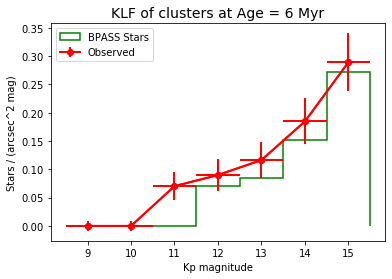

In [7]:
import matplotlib.pyplot as py
# Primary star fluxes
klf_mag_bins = np.arange(9.0, 17, 1.0)
binsKp = klf_mag_bins
binEdges = binsKp[0:-1] + (binsKp[1:] - binsKp[0:-1]) / 2.0

weightsBPS = np.array([1.0 for x in totl_BPASS])
weightsBPS *= scaleFactorBPS
(n1, b1, p1) = py.hist(totl_BPASS, bins=binEdges, weights=weightsBPS,
                       histtype='step', color='green',
                       label='BPASS Stars', align='mid',
                       linewidth=1.5)
py.errorbar(result.Kp[idx],
            result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', xerr=magBin/2.0, linewidth=2)
py.errorbar(result.Kp[idx], result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', yerr=result.eKLF_ext_cmp_sp_im_noWR[idx],
            linewidth=2,
            label='Observed')
py.legend(loc='upper left', numpoints=1)
py.xlabel('Kp magnitude')
py.ylabel('Stars / (arcsec^2 mag)')
py.title('KLF of clusters at Age = %d Myr' % (10**(6.78 - 6)),
         fontsize=14)

**Now I create the MIST v1 cluster and then make the final figure of the talk.**

In [8]:
MIST_iso = synthetic.IsochronePhot(6.78, 2.7, 8000, 0.0,
                                   min_mass = 1.0,
                                   max_mass = 150,
                                   filters=['nirc2,Kp'])
MIST_Cluster = synthetic.ResolvedCluster(MIST_iso, custom_IMF,
                                         1000000,
                                         ifmr=ifmr.IFMR_Spera15())

Found 242 stars out of mass range
Found 3509 companions out of stellar mass range


In the next cell, I make sure that I am NOT including WR stars in my plots and that I am not including stars with magnitudes greater than cutoff (K' = 15.5)
here, I want to make an array like object of individual MIST stars' magnitudes (not necessarily just of star systems)

In [9]:
totl_mist =(MIST_Cluster.star_systems['m_nirc2_Kp']
            [np.where((MIST_Cluster.star_systems['isWR'] == 0))[0]])
# Now find the magintudes of just the primary star

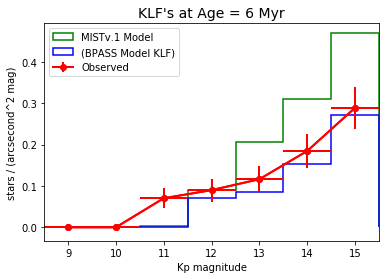

In [10]:
import matplotlib.pyplot as py

area = 116.098  # arcsec^2
# Setting up framework so that I can scale the number of stars in mass bin
# into density: number of stars per square arcsecond.

mist_scale = ((17000/ MIST_Cluster.star_systems['systemMass'].sum()) /
              area)
weightsMST = np.array([1.0 for x in totl_mist])
weightsMST *= mist_scale
# Binning the K' magnitudes into their respective bins

py.hist(totl_mist, bins=binEdges, histtype='step',
        weights=weightsMST, color='green', label='MISTv.1 Model',
        align='mid', linewidth=1.5)
py.hist(totl_BPASS, bins=binEdges, histtype='step',
        weights=weightsBPS, color='blue',
        label='(BPASS Model KLF)',
        align='mid', linewidth=1.5)
py.errorbar(result.Kp[idx], result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', xerr=magBin/2.0, capsize=0, linewidth=2)
py.errorbar(result.Kp[idx],result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', yerr=result.eKLF_ext_cmp_sp_im_noWR[idx],
            linewidth=2,
       label='Observed')
py.xlim(8.5, 15.5)
py.xlabel('Kp magnitude')
py.ylabel("stars / (arcsecond^2 mag)")
py.title("KLF's at Age = %d Myr" % (10**(6.78 - 6)), fontsize=14)
py.legend(loc='upper left', numpoints=1)

In [11]:
mist_scale

0.00014645572099540594

What could be wrong here? Check the BPASS cluster mass. As we will see, it is lower than it should be.

In [12]:
BPASS_Cluster.star_systems['systemMass'].sum()

1877380.5593775935

The previous shows that I only got half of the BPASS_Cluster mass that I have wished! And perhaps we may need more accurate ZAMS masses in the NEWSECMODS stars (i.e. systems where the primary star is a compact remnant) in order to fix the KLF. This may help as this could (a) increase the BPASS_Cluster mass to what it should be and (b) enhance the KLF by providing more accurate matches of stars by mass and separation.

Now, what are the demographics of the stars causing this?

So it looks like the star systems that **consistently** contribute to the high KLF are the multi star systems.